# One Mask

In [7]:
import tensorflow as tf
import os

from assets.one_mask.data_generator import DR_Generator
from assets.one_mask.models import SMD_Unet 
from assets.one_mask.trainer_withCE import Trainer

In [8]:
masks = ['HardExudate_Masks', 'Hemohedge_Masks', 'Microaneurysms_Masks', 'SoftExudate_Masks']
mask_dir = '../data/Seg-set'
mask_paths = [os.path.join(mask_dir, mask) for mask in masks]

generator_args = {
    'dir_path':'../data/Seg-set/Original_Images/',
    'mask_path':mask_paths,
    'use_mask':True,
    'img_size':(512, 512),  
    'batch_size':4, # 8로 하면 바로 OOM 뜸
    'dataset':'FGADR', # FGADR or EyePacks
    'use_3channel':True,
    'CLAHE_args':[3.0, (8, 8)]
}
 
tr_fgadr_gen = DR_Generator(start_end_index=(0, 1108), is_train=True, **generator_args)
val_fgadr_gen = DR_Generator(start_end_index=(1108, 1660), is_train=False, **generator_args)
ts_fgadr_gen = DR_Generator(start_end_index=(1660, 1840), is_train=False, **generator_args)

# tr_fgadr_gen = DR_Generator(start_end_index=(0, 128), is_train=True, **generator_args)
# val_fgadr_gen = DR_Generator(start_end_index=(128, 256), is_train=False, **generator_args)

In [9]:
model = SMD_Unet(enc_filters=[64, 128, 256, 512, 1024], dec_filters=[512, 256, 64, 32], input_channel=3)
# model.load_weights("../models/one_mask/withoutCLAHE_withRecons_alpha01_lr0001_3channel/21")

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 

trainer_args = {
    'model':model,
    'epochs':50,
    'optimizer':optimizer,
    'for_recons':False,
    'alpha':0.1,
    'beta':None,
    'first_epoch':1,
    'file_name':"history/one_mask/9_useCLAHE_05CE.txt",
    'save_model_path':"../models/one_mask/3_useCLAHE_05CE",
    'add_noise':False,
    'bce_weight':0.5
}
trainer = Trainer(**trainer_args)

trainer.train(train_dataset=tr_fgadr_gen,
              val_dataset=val_fgadr_gen
             )


Epoch 1/50
552/552 [==============================] - 210s 380ms/step - val_loss: 0.9824 - mask_loss: 1.0820 - loss_recons: 0.0859 - dice_loss: 0.9590 - bce_loss: 0.2459

Epoch 2/50
552/552 [==============================] - 137s 248ms/step - val_loss: 1.0273 - mask_loss: 1.1349 - loss_recons: 0.0589 - dice_loss: 0.9500 - bce_loss: 0.3699

Epoch 3/50
552/552 [==============================] - 137s 249ms/step - val_loss: 0.9564 - mask_loss: 1.0597 - loss_recons: 0.0266 - dice_loss: 0.9245 - bce_loss: 0.2703

Epoch 4/50
552/552 [==============================] - 137s 248ms/step - val_loss: 0.8959 - mask_loss: 0.9936 - loss_recons: 0.0164 - dice_loss: 0.8980 - bce_loss: 0.1913

Epoch 5/50
 376/1108 [=========>....................] - ETA: 4:50 - train_loss: 0.8137 - mask_loss: 0.9029 - loss_recons: 0.0105 - dice_loss: 0.7904 - bce_loss: 0.0882

## history 그려보기

In [3]:
from assets.one_mask.utils import parse_history_text
from matplotlib.ticker import StrMethodFormatter
import matplotlib.pyplot as plt
import os

In [4]:
os.listdir('history/one_mask')

['New',
 '.ipynb_checkpoints',
 'test.txt',
 'withoutCLAHE_withRecons_alpha01_lr0001.txt',
 'withoutCLAHE_withRecons_alpha01_lr00001_3channel.txt',
 '3_useCLAHE.txt',
 'withoutCLAHE_withRecons_alpha01_lr0001_3channel.txt',
 'pretraning_lr00001_3channel.txt',
 'Old',
 'withoutCLAHE_withRecons_alpha01_lr00001.txt']

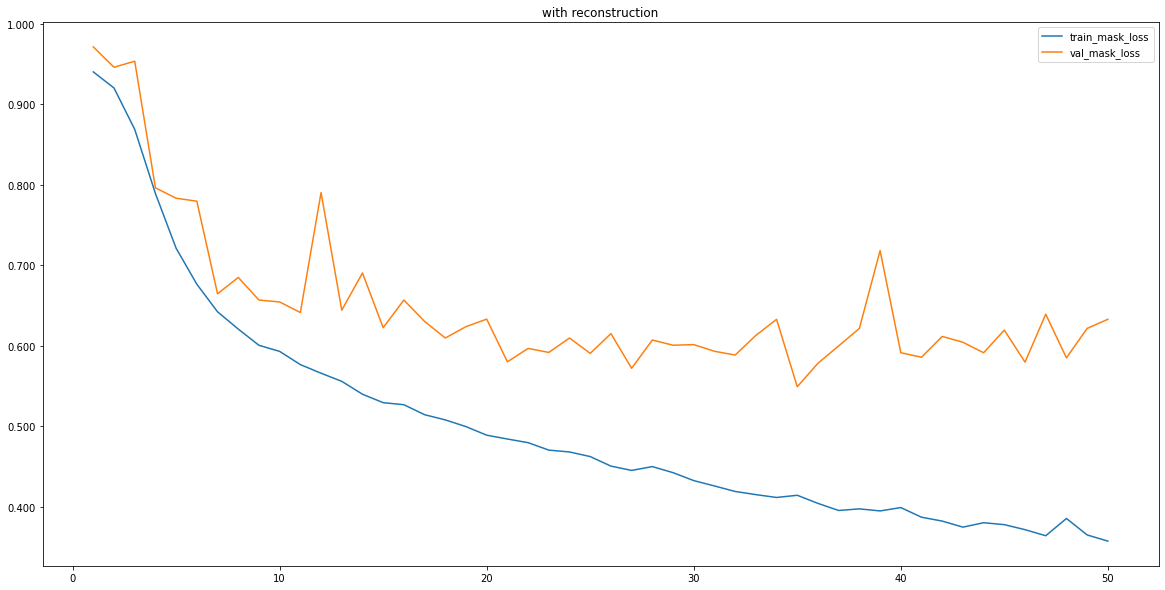

In [5]:
history = parse_history_text('history/one_mask/3_useCLAHE.txt')


plt.figure(figsize=(20, 10))
plt.plot(history['epoch'], history['train_mask_loss'], label='train_mask_loss')
plt.plot(history['epoch'], history['val_mask_loss'], label='val_mask_loss')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))


plt.title('with reconstruction')
plt.legend()
plt.show()

# Four mask

In [2]:
import tensorflow as tf
import os

from assets.four_mask.data_generator import DR_Generator
from assets.four_mask.models import SMD_Unet 
from assets.four_mask.trainer import Trainer

In [3]:
masks = ['HardExudate_Masks', 'Hemohedge_Masks', 'Microaneurysms_Masks', 'SoftExudate_Masks']
mask_dir = '../data/Seg-set'
mask_paths = [os.path.join(mask_dir, mask) for mask in masks]

generator_args = {
    'dir_path':'../data/Seg-set/Original_Images/',
    'mask_path':mask_paths,
    'use_mask':True,
    'img_size':(512, 512),  
    'batch_size':4, # 8로 하면 바로 OOM 뜸
    'dataset':'FGADR', # FGADR or EyePacks
    'use_3channel':True,
    'CLAHE_args':None,
    'add_noise_std':None
}
 
    
tr_fgadr_gen = DR_Generator(start_end_index=(0, 128), is_train=True, **generator_args)
val_fgadr_gen = DR_Generator(start_end_index=(128, 256), is_train=False, **generator_args)

# tr_fgadr_gen = DR_Generator(start_end_index=(0, 1292), is_train=True, **generator_args)
# val_fgadr_gen = DR_Generator(start_end_index=(1292, 1476), is_train=False, **generator_args)
# ts_fgadr_gen = DR_Generator(start_end_index=(1476, 1842), is_train=False, **generator_args)

In [4]:
model = SMD_Unet(enc_filters=[32, 64, 128, 256, 512], dec_filters=[512, 256, 64, 32], input_channel=3)

In [5]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 

trainer_args = {
    'model':model,
    'epochs':50,
    'optimizer':optimizer,
    'for_recons':False,
    'alpha':0.1,
    'beta':[0.25, 0.25, 0.25, 0.25],
    'first_epoch':1,
    'file_name':"history/four_mask/test.txt",
    'save_model_path':"../models/four_mask/test",
    'add_noise':False
}
trainer = Trainer(**trainer_args)

trainer.train(train_dataset=tr_fgadr_gen,
              val_dataset=val_fgadr_gen
             )


Epoch 1/50
128/128 [==============================] - 41s 317ms/step - val_loss: 0.8970 - mask_loss: 0.9895 - loss_recons: 0.0646 - ex_loss: 0.9866 - he_loss: 0.9829 - ma_loss: 0.9918 - se_loss: 0.9967

Epoch 2/50
128/128 [==============================] - 39s 304ms/step - val_loss: 0.8951 - mask_loss: 0.9896 - loss_recons: 0.0446 - ex_loss: 0.9869 - he_loss: 0.9831 - ma_loss: 0.9919 - se_loss: 0.9967

Epoch 3/50
128/128 [==============================] - 39s 304ms/step - val_loss: 0.8949 - mask_loss: 0.9896 - loss_recons: 0.0417 - ex_loss: 0.9870 - he_loss: 0.9830 - ma_loss: 0.9919 - se_loss: 0.9968

Epoch 4/50
128/128 [==============================] - 39s 304ms/step - val_loss: 0.8936 - mask_loss: 0.9897 - loss_recons: 0.0290 - ex_loss: 0.9870 - he_loss: 0.9830 - ma_loss: 0.9919 - se_loss: 0.9969

Epoch 5/50
128/128 [==============================] - 39s 304ms/step - val_loss: 0.8931 - mask_loss: 0.9894 - loss_recons: 0.0264 - ex_loss: 0.9865 - he_loss: 0.9826 - ma_loss: 0.9919 - s

KeyboardInterrupt: 

# Pretraining

In [1]:
import tensorflow as tf
import os

from assets.one_mask.data_generator import DR_Generator
from assets.one_mask.models import SMD_Unet 
from assets.one_mask.trainer import Trainer

In [5]:
generator_args = {
    'dir_path':'../data/preprocessed/',
    'mask_path':None,
    'use_mask':False,
    'img_size':(512, 512),  
    'batch_size':4, # 8로 하면 바로 OOM 뜸
    'dataset':'EyePacks', # FGADR or EyePacks
    'use_3channel':True,
    'CLAHE_args':None,
    'add_noise_std':0.2
}
 
    
tr_eyepacks_gen = DR_Generator(start_end_index=(33000, 34000), **generator_args)
val_eyepacks_gen = DR_Generator(start_end_index=(30000, 33000), **generator_args)

In [3]:
model = SMD_Unet(enc_filters=[64, 128, 256, 512, 1024], dec_filters=[512, 256, 64, 32], input_channel=3)
# model.load_weights("../models/one_mask/withoutCLAHE_withRecons_alpha01_lr0001_3channel/21")

In [6]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) 

trainer_args = {
    'model':model,
    'epochs':50,
    'optimizer':optimizer,
    'for_recons':True,
    'alpha':1.0,
    'beta':None,
    'first_epoch':1,
    'file_name':"history/one_mask/pretraning_lr00001_3channel.txt",
    'save_model_path':"../models/one_mask/pretraning_lr00001_3channel",
    'add_noise':True
}
trainer = Trainer(**trainer_args)

trainer.train(train_dataset=tr_eyepacks_gen,
              val_dataset=val_eyepacks_gen
             )


Epoch 1/50
3000/3000 [==============================] - 398s 133ms/step - val_loss: 0.0057 - loss_recons: 0.0057

Epoch 2/50
 20/816 [..............................] - ETA: 3:05 - train_loss: 0.0060 - loss_recons: 0.0060

KeyboardInterrupt: 

# Functional API로 해보기

In [1]:
from assets.test.data_generator import DR_Generator
import os
from assets.one_mask.functional_models import Unet 
# from assets.trainer import Trainer
from assets.test.models import SMD_Unet
import tensorflow as tf
from tensorflow.keras import backend as K

In [2]:
def dice_coef(y_true, y_pred, smooth=100):        
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return dice

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

In [3]:
masks = ['HardExudate_Masks', 'Hemohedge_Masks', 'Microaneurysms_Masks', 'SoftExudate_Masks']
mask_dir = '../data/Seg-set'
mask_paths = [os.path.join(mask_dir, mask) for mask in masks]

generator_args = {
    'dir_path':'../data/Seg-set/Original_Images/',
    'mask_path':mask_paths,
    'use_mask':True,
    'img_size':(512, 512),  
    'batch_size':4, # 8로 하면 바로 OOM 뜸
    'dataset':'FGADR', # FGADR or EyePacks
    'is_train':True,
    'use_3channel':False,
    'CLAHE_args':None
}

tr_fgadr_gen = DR_Generator(start_end_index=(0, 1292), **generator_args)
val_fgadr_gen = DR_Generator(start_end_index=(1292, 1476), **generator_args)
ts_fgadr_gen = DR_Generator(start_end_index=(1476, 1842), **generator_args)

In [4]:
unet = SMD_Unet(enc_filters=[64, 128, 256, 512, 1024], dec_filters=[512, 256, 64, 32], input_channel=1)

In [4]:
unet = Unet(filters=[64, 128, 256, 512, 1024], img_size=(512, 512))

In [5]:
unet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=dice_coef_loss)

In [6]:
unet.fit(tr_fgadr_gen, 
         validation_data=val_fgadr_gen, 
         epochs=50)

Epoch 1/50
323/323 [==============================] - 283s 843ms/step - loss: 0.9407 - val_loss: 0.9566
Epoch 2/50
323/323 [==============================] - 270s 835ms/step - loss: 0.9254 - val_loss: 0.9424
Epoch 3/50
323/323 [==============================] - 270s 834ms/step - loss: 0.8758 - val_loss: 0.9287
Epoch 4/50
323/323 [==============================] - 271s 837ms/step - loss: 0.7606 - val_loss: 0.7711
Epoch 5/50
323/323 [==============================] - 271s 839ms/step - loss: 0.6844 - val_loss: 0.6974
Epoch 6/50
 79/323 [======>.......................] - ETA: 3:09 - loss: 0.6341

KeyboardInterrupt: 

trainer에 문제가 있는 거구나

# mask만 학습시켜보기

In [1]:
from assets.test.data_generator import DR_Generator
import os
# from assets.one_mask.functional_models import Unet 
from assets.test.trainer import Trainer
from assets.test.models import SMD_Unet
import tensorflow as tf
from tensorflow.keras import backend as K

In [2]:
masks = ['HardExudate_Masks', 'Hemohedge_Masks', 'Microaneurysms_Masks', 'SoftExudate_Masks']
mask_dir = '../data/Seg-set'
mask_paths = [os.path.join(mask_dir, mask) for mask in masks]

generator_args = {
    'dir_path':'../data/Seg-set/Original_Images/',
    'mask_path':mask_paths,
    'use_mask':True,
    'img_size':(512, 512),  
    'batch_size':4, # 8로 하면 바로 OOM 뜸
    'dataset':'FGADR', # FGADR or EyePacks
    'is_train':True,
    'use_3channel':False,
    'CLAHE_args':None
}

tr_fgadr_gen = DR_Generator(start_end_index=(0, 1292), **generator_args)
val_fgadr_gen = DR_Generator(start_end_index=(1292, 1476), **generator_args)
ts_fgadr_gen = DR_Generator(start_end_index=(1476, 1842), **generator_args)

In [3]:
model = SMD_Unet(enc_filters=[64, 128, 256, 512, 1024], dec_filters=[512, 256, 64, 32], input_channel=1)

In [4]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 

trainer_args = {
    'model':model,
    'epochs':50,
    'optimizer':optimizer,
    'for_recons':False,
    'alpha':0.0,
    'beta':None,
    'first_epoch':1,
#     'file_name':"history/withoutCLAHE_withoutRecons_lr0001.txt",
#     'save_model_path':"../models/withoutCLAHE_withoutRecons_lr0001",
    'add_noise':False
}
trainer = Trainer(**trainer_args)

trainer.train(train_dataset=tr_fgadr_gen,
              val_dataset=val_fgadr_gen,
             )


Epoch 1/50
184/184 [==============================] - 33s 180ms/step - val_loss: 0.9531 - mask_loss: 0.9717

Epoch 2/50
184/184 [==============================] - 34s 186ms/step - val_loss: 0.9529 - mask_loss: 0.9652

Epoch 3/50
184/184 [==============================] - 33s 180ms/step - val_loss: 0.7754 - mask_loss: 0.8144

Epoch 4/50
  24/1292 [..............................] - ETA: 5:07 - train_loss: 0.7680 - mask_loss: 0.7680

KeyboardInterrupt: 

여전히 잘 안됨.   
custom trainer랑 model.fit이랑 차이가 도대체 뭘까?

```python
# for training
logits = model(x_batch_train, training=True)
# for validation
logits = model(x_batch_val, training=False)
```

# 학습만 따로 시켜보기

In [1]:
from tensorflow.keras.utils import Progbar
from assets.test.data_generator import DR_Generator
import os
# from assets.one_mask.functional_models import Unet 
from assets.test.trainer import Trainer
from assets.test.models import SMD_Unet
import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np

def dice_coef(y_true, y_pred, smooth=100):        
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return dice

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

masks = ['HardExudate_Masks', 'Hemohedge_Masks', 'Microaneurysms_Masks', 'SoftExudate_Masks']
mask_dir = '../data/Seg-set'
mask_paths = [os.path.join(mask_dir, mask) for mask in masks]

generator_args = {
    'dir_path':'../data/Seg-set/Original_Images/',
    'mask_path':mask_paths,
    'use_mask':True,
    'img_size':(512, 512),  
    'batch_size':4, # 8로 하면 바로 OOM 뜸
    'dataset':'FGADR', # FGADR or EyePacks
    'is_train':True,
    'use_3channel':False,
    'CLAHE_args':None
}

tr_fgadr_gen = DR_Generator(start_end_index=(0, 1292), **generator_args)
val_fgadr_gen = DR_Generator(start_end_index=(1292, 1476), **generator_args)
ts_fgadr_gen = DR_Generator(start_end_index=(1476, 1842), **generator_args)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 

In [2]:
model = SMD_Unet(enc_filters=[64, 128, 256, 512, 1024], dec_filters=[512, 256, 64, 32], input_channel=1)

In [3]:
epochs = 50
for epoch in range(epochs):
    print(f"\nStart of epoch {epoch}")
    
    tr_progBar = Progbar(target=len(tr_fgadr_gen) * tr_fgadr_gen.batch_size, 
                                 stateful_metrics=['mask_loss', 'train_loss'])
    
    mask_batch_loss = []
    # Iterate over the batches of the dataset.
    for step_train, (x_batch_train, y_batch_train) in enumerate(tr_fgadr_gen):
        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:
            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            mask_hat = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            mask_loss = dice_coef_loss(y_batch_train, mask_hat)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(mask_loss, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
        values = [('mask_loss', mask_loss.numpy())]
        
        mask_batch_loss.append(mask_loss.numpy())
        
        if (step_train + 1) == len(tr_fgadr_gen):
            values = [('mask_loss', np.mean(mask_batch_loss))]
                
        tr_progBar.update((step_train + 1) * tr_fgadr_gen.batch_size, values=values)


Start of epoch 0
1292/1292 [==============================] - 475s 367ms/step - mask_loss: 0.9285

Start of epoch 1
1292/1292 [==============================] - 457s 354ms/step - mask_loss: 0.8629

Start of epoch 2
 276/1292 [=====>........................] - ETA: 5:57 - mask_loss: 0.7421

KeyboardInterrupt: 

# Classification

In [1]:
from tensorflow.keras.utils import Progbar
from assets.classification.data_generator import DR_Generator
import os
from assets.classification.models import SnC_Unet
import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np

tf.config.run_functions_eagerly(True)

def dice_coef(y_true, y_pred, smooth=100):        
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return dice

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

masks = ['HardExudate_Masks', 'Hemohedge_Masks', 'Microaneurysms_Masks', 'SoftExudate_Masks']
mask_dir = '../data/Seg-set'
mask_paths = [os.path.join(mask_dir, mask) for mask in masks]

generator_args = {
    'dir_path':'../data/Seg-set/Original_Images/',
    'mask_path':mask_paths,
    'use_mask':True,
    'img_size':(512, 512),  
    'batch_size':4, # 8로 하면 바로 OOM 뜸
    'dataset':'FGADR', # FGADR or EyePacks
    'use_3channel':True,
    'CLAHE_args':None,
    'label_path':'../data/Seg-set/DR_Seg_Grading_Label.csv'
}

tr_fgadr_gen = DR_Generator(start_end_index=(0, 1108), is_train=True, **generator_args)
val_fgadr_gen = DR_Generator(start_end_index=(1108, 1660), is_train=False, **generator_args)
ts_fgadr_gen = DR_Generator(start_end_index=(1660, 1840), is_train=False, **generator_args)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 

In [2]:
model = SnC_Unet(enc_filters=[64, 128, 256, 512, 1024], dec_filters=[512, 256, 64, 32], input_channel=3)

In [3]:
model.decoder.trainable=False

In [4]:
cls_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

epochs = 50

for epoch in range(epochs):
    print(f"\nStart of epoch {epoch}")
    
    tr_progBar = Progbar(target=len(tr_fgadr_gen) * tr_fgadr_gen.batch_size, 
                                 stateful_metrics=['cls_loss'])
    
    cls_batch_loss = []
    
    # Iterate over the batches of the dataset.
    for step_train, (x_batch_train, y_batch_train) in enumerate(tr_fgadr_gen):
        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:
            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            preds = model(x_batch_train[0], training=True, only_cls=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            cls_loss = cls_loss_fn(y_batch_train[1], preds[0])
            
        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(cls_loss, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
        values = [('cls_loss', cls_loss.numpy())]
        
        cls_batch_loss.append(cls_loss.numpy())
        
        if (step_train + 1) == len(tr_fgadr_gen):
            values = [('cls_loss', np.mean(cls_batch_loss))]
                
        tr_progBar.update((step_train + 1) * tr_fgadr_gen.batch_size, values=values)
        
    val_progBar = Progbar(target=len(val_fgadr_gen) * val_fgadr_gen.batch_size, 
                                 stateful_metrics=['cls_loss'])
    
    cls_batch_loss = []
    
     # Iterate over the batches of the dataset.
    for step_train, (x_batch_train, y_batch_train) in enumerate(val_fgadr_gen):
        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:
            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            preds = model(x_batch_train[0], training=False, only_cls=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            cls_loss = cls_loss_fn(y_batch_train[1], preds[0])
            
        
        values = [('cls_loss', cls_loss.numpy())]
        
        cls_batch_loss.append(cls_loss.numpy())
        
        if (step_train + 1) == len(tr_fgadr_gen):
            values = [('cls_loss', np.mean(cls_batch_loss))]
                
        val_progBar.update((step_train + 1) * tr_fgadr_gen.batch_size, values=values)


Start of epoch 0
552/552 [==============================] - 104s 189ms/step - cls_loss: 5.0314

Start of epoch 1
552/552 [==============================] - 105s 189ms/step - cls_loss: 2.6512

Start of epoch 2
552/552 [==============================] - 105s 189ms/step - cls_loss: 1.3127

Start of epoch 3
552/552 [==============================] - 105s 190ms/step - cls_loss: 5.2764

Start of epoch 4
552/552 [==============================] - 105s 189ms/step - cls_loss: 8.7386

Start of epoch 5
552/552 [==============================] - 104s 189ms/step - cls_loss: 1.7207

Start of epoch 6
552/552 [==============================] - 104s 189ms/step - cls_loss: 18.2105

Start of epoch 7
552/552 [==============================] - 104s 189ms/step - cls_loss: 2.2369

Start of epoch 8
552/552 [==============================] - 104s 189ms/step - cls_loss: 1.6299

Start of epoch 9
552/552 [==============================] - 104s 189ms/step - cls_loss: 1.3587

Start of epoch 10
552/552 [===========

KeyboardInterrupt: 

# 결과 시각화하기

In [23]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
generator_args = {
  'dir_path':'../data/train',
  'mask_path':None,
  'use_mask':False,
  'img_size':(512, 512),  
  'batch_size':4, # 8로 하면 바로 OOM 뜸
  'dataset':'EyePacks', # FGADR or EyePacks
  'is_train':True
}

tr_eyepacks_gen = DR_Generator(start_end_index=(0, 10000), **generator_args)
val_eyepacks_gen = DR_Generator(start_end_index=(10000, 11000), **generator_args)

In [10]:
for inputs, _, in val_eyepacks_gen:
    break
    
inputs.shape

(4, 512, 512, 1)

In [4]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) 

trainer_args = {
    'model':model,
    'epochs':3,
    'optimizer':optimizer,
    'for_recons':True,
    'alpha':0.1,
    'beta':[0.25, 0.25, 0.25, 0.25]
}
trainer = Trainer(**trainer_args)

history = trainer.train(train_dataset=tr_eyepacks_gen,
                        val_dataset=val_eyepacks_gen,
                       )


Epoch 1/3
1000/1000 [==============================] - 178s 178ms/step - val_loss: 9.8469e-06

Epoch 2/3
1000/1000 [==============================] - 178s 178ms/step - val_loss: 4.5066e-06

Epoch 3/3
1000/1000 [==============================] - 194s 194ms/step - val_loss: 2.4240e-06


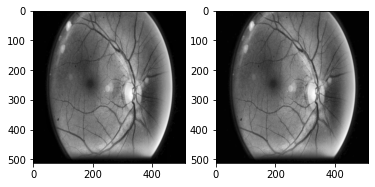

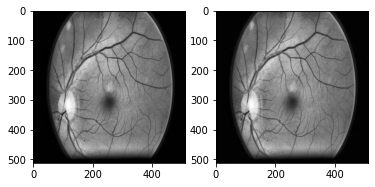

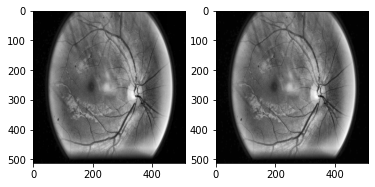

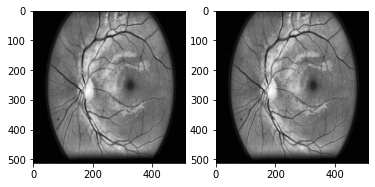

In [32]:
preds = model(inputs)[0].numpy()

for input, pred in zip(inputs, preds):
    plt.subplot(1, 2, 1)
    plt.imshow(np.int_(input * 255), cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(np.int_(pred * 255), cmap='gray')
    plt.show()